In [1]:
# import os
import sys
import importlib
sys.path.append("/tmp/pycharm_project_568/Classification/")
# # from dataset_tool.dataset_loader import *
# import importer
# from dataset_tool.dataset_loader import *
import dataset_tool.dataset_loader
importlib.reload(dataset_tool.dataset_loader)

<module 'dataset_tool.dataset_loader' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_loader.py'>

In [2]:
dataset = dataset_tool.dataset_loader.load_dataset5()

test
Shape of array is (6966,)
COnfig path /tmp/pycharm_project_568/Classification/dataset_config
to_learch city,water,field,forest
Processing city
Size of city is 49600
Processing water
Size of water is 155000
Processing field
Size of field is 982700
Processing forest
Size of forest is 456100
Train size: 1314720. Test size: 328680


In [3]:
import Classification.dataset_tool.dataset_loader

ModuleNotFoundError: No module named 'Classification'

In [3]:
x_train = dataset.x_train
y_train = dataset.y_train

In [4]:
y_train[y_train != 4] = 2


In [5]:
y_train[y_train == 4] = 1

In [6]:
from cuml.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=400, p=2, weights='uniform')
knnc_epochs = 20
# for i in range(knnc_epochs):
knn_1.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
topixels = lambda x: x*255

In [8]:
import numpy as np

In [9]:
x_train_2 = np.vectorize(topixels)(x_train)

In [10]:
x_train.shape

(1314720, 12)

In [97]:
x_train_2.shape

(1314720, 12)

In [11]:
x_train_2_ = x_train_2.astype(np.int32)

In [104]:
x_train_2_.dtype

dtype('int32')

In [12]:
from cuml.naive_bayes import *
nb = GaussianNB()
nb.fit(x_train_2, y_train)

GaussianNB()

In [13]:
from cuml import SVC

svm = SVC(C=3.0, kernel='rbf', degree=6, cache_size=12096,probability=True)

In [14]:
svm.fit(x_train, y_train)

SVC()

In [15]:
from dataset_tool.real_prediction import *

In [16]:
real_prediction_knn = RealPrediction("/tmp/shared/dataset4/2", None)

In [12]:
real_prediction_knn.x_scaled_base.shape

(697972, 12)

In [17]:
predciton_proba = knn_1.predict_proba(real_prediction_knn.x_scaled_base)

In [18]:
x_testt_scaled_2 = np.vectorize(topixels)(real_prediction_knn.x_scaled_base)

In [19]:
predciton_proba_nb = nb.predict_proba(x_testt_scaled_2)

In [20]:
predciton_proba_svm = svm.predict_proba(real_prediction_knn.x_scaled_base)

In [21]:
predciton_proba_svm

array([[0.27805609, 0.72194391],
       [0.27805609, 0.72194391],
       [0.27805609, 0.72194391],
       ...,
       [0.45249081, 0.54750919],
       [0.76926764, 0.23073236],
       [0.64627731, 0.35372269]])

In [22]:
import numpy as np

In [23]:
predciton_proba.shape

(697972, 2)

In [39]:
ts = 0.9

In [43]:
def check_vlue(subarr):
    print(subarr)
    if (subarr[1] >= ts):
        return 2
    else:
        return 1

## >= 0.9

In [38]:
from matplotlib.colors import ListedColormap
colormap=ListedColormap(['orange','green'])

In [39]:
preditctions0_9 = np.where(predciton_proba[:,0] >= 0.9, 1, 2)

In [40]:
preditctions0_9_nb = np.where(predciton_proba_nb[:,0] >= 0.9, 1, 2)

In [41]:
preditctions0_9_svm = np.where(predciton_proba_svm[:,0] >= 0.9, 1, 2)

In [42]:
preditctions0_9.shape

(697972,)

In [43]:
im0_9  = preditctions0_9.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [44]:
im0_9nb  = preditctions0_9_nb.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [45]:
im0_9_svm  = preditctions0_9_svm.reshape((real_prediction_knn.height,real_prediction_knn.width))

### KNNC

[Text(1, 1, 'city'), Text(1, 2, 'others')]

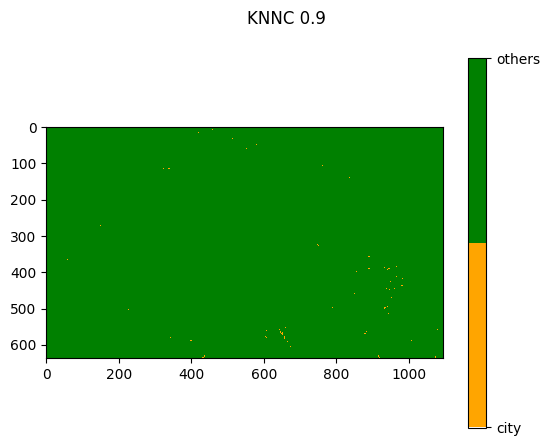

In [46]:
import matplotlib.pyplot as plt
plt.imshow(im0_9, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("KNNC 0.9")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

### NB

[Text(1, 1, 'city'), Text(1, 2, 'others')]

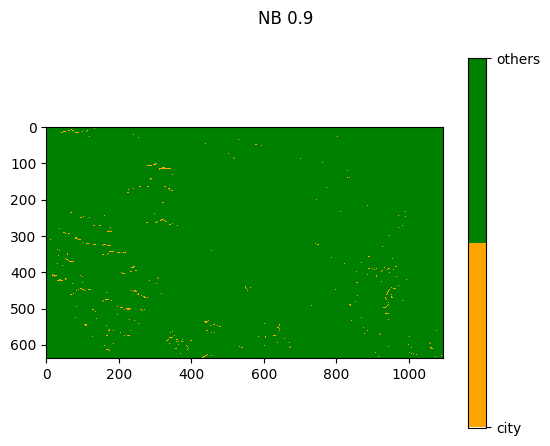

In [47]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
plt.imshow(im0_9nb, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("NB 0.9")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

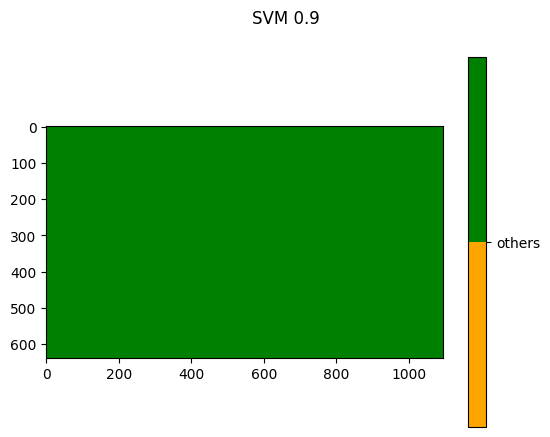

In [48]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
plt.imshow(im0_9_svm, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("SVM 0.9")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

## >= 0.8

In [49]:
preditctions0_8 = np.where(predciton_proba[:, 0] >= 0.8, 1, 2)

In [50]:
preditctions0_8_nb = np.where(predciton_proba_nb[:, 0] >= 0.8, 1, 2)

In [51]:
preditctions0_8_svm = np.where(predciton_proba_svm[:, 0] >= 0.8, 1, 2)

In [52]:
im0_8  = preditctions0_8.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [53]:
im0_8_nb = preditctions0_8_nb.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [54]:
im0_8_svm = preditctions0_8_svm.reshape((real_prediction_knn.height,real_prediction_knn.width))

[Text(1, 1, 'city'), Text(1, 2, 'others')]

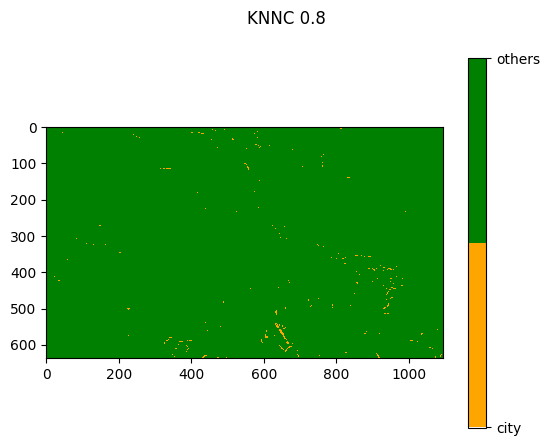

In [55]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
plt.imshow(im0_8, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.title = "KKNC"
plt.suptitle("KNNC 0.8")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

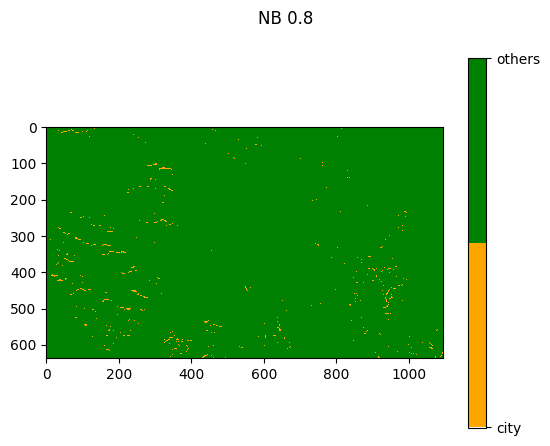

In [56]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
plt.imshow(im0_8_nb, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("NB 0.8")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

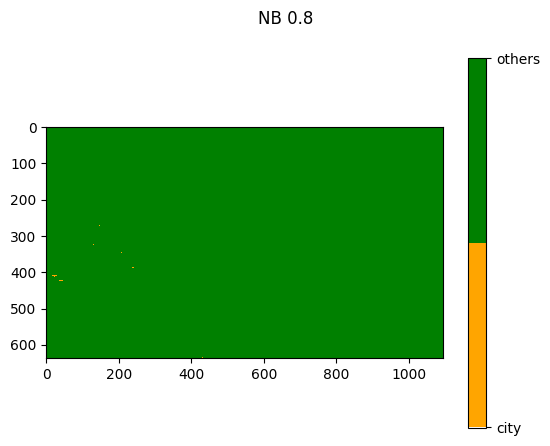

In [57]:
import matplotlib.pyplot as plt
#
plt.imshow(im0_8_svm, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("NB 0.8")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

## >= 0.7

In [58]:
preditctions0_7 =  np.where(predciton_proba[:, 0] >= 0.7, 1, 2)

In [59]:
preditctions0_7_svm =  np.where(predciton_proba_svm[:, 0] >= 0.7, 1, 2)

In [60]:
preditctions0_7_nb = np.where(predciton_proba_nb[:, 0] >= 0.7, 1, 2)

In [61]:
im0_7  = preditctions0_7.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [62]:
im0_7_nb  = preditctions0_7_nb.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [63]:
im0_7_svm  = preditctions0_7_svm.reshape((real_prediction_knn.height,real_prediction_knn.width))

[Text(1, 1, 'city'), Text(1, 2, 'others')]

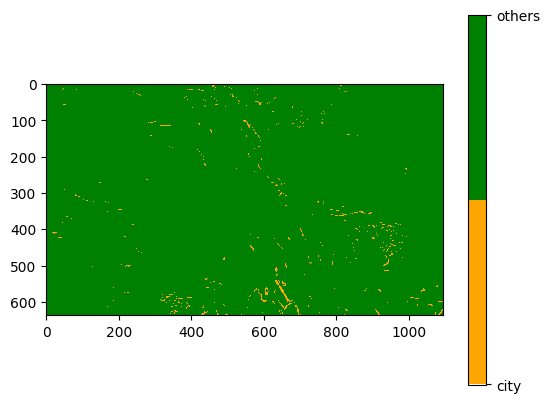

In [64]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plt.imshow(im0_7, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.title = "KKNC 0.7"
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

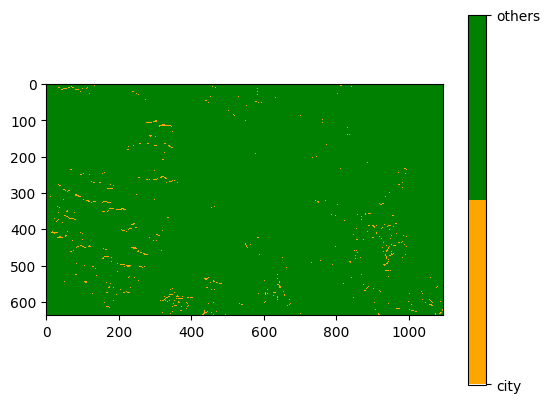

In [65]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plt.imshow(im0_7_nb, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.title = "NB 0.7"
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

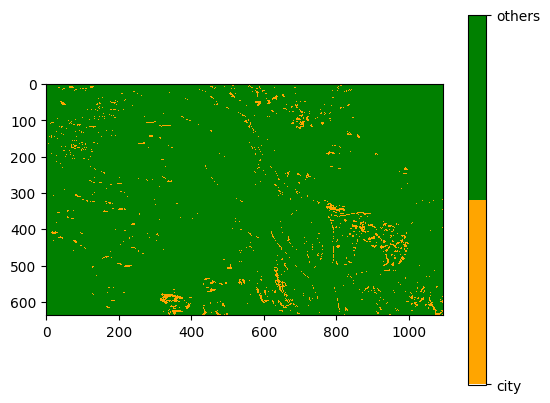

In [66]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plt.imshow(im0_7_svm, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.title = "SVM 0.7"
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

## >= 0.6

In [67]:
preditctions0_6 = np.where(predciton_proba[:, 0] >= 0.6, 1, 2)

In [68]:
preditctions0_6_nb = np.where(predciton_proba_nb[:, 0] >= 0.6, 1, 2)

In [69]:
preditctions0_6_svm = np.where(predciton_proba_svm[:, 0] >= 0.6, 1, 2)

In [70]:
im0_6  = preditctions0_6.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [71]:
im0_6_nb  = preditctions0_6_nb.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [72]:
im0_6_svm  = preditctions0_6_svm.reshape((real_prediction_knn.height,real_prediction_knn.width))

[Text(1, 1, 'city'), Text(1, 2, 'others')]

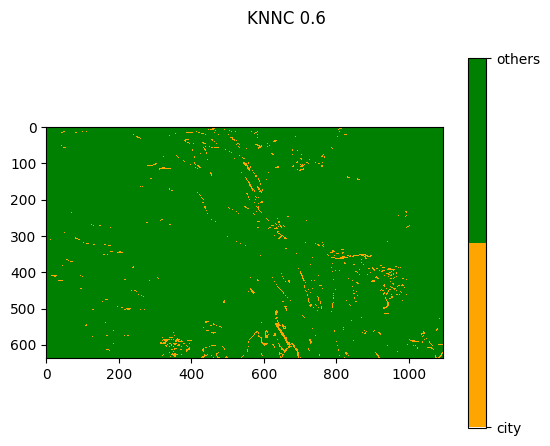

In [73]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plt.imshow(im0_6, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("KNNC 0.6")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

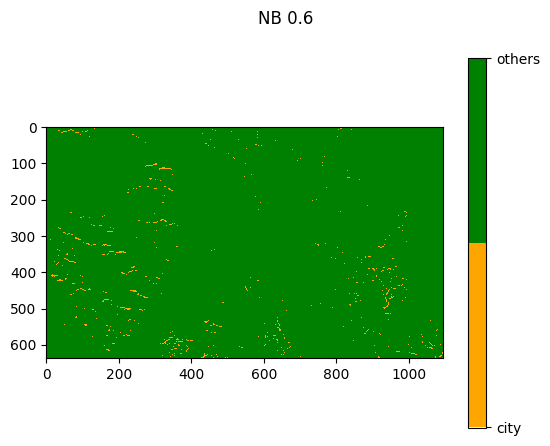

In [74]:
import matplotlib.pyplot as plt

plt.imshow(im0_6_nb, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("NB 0.6")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

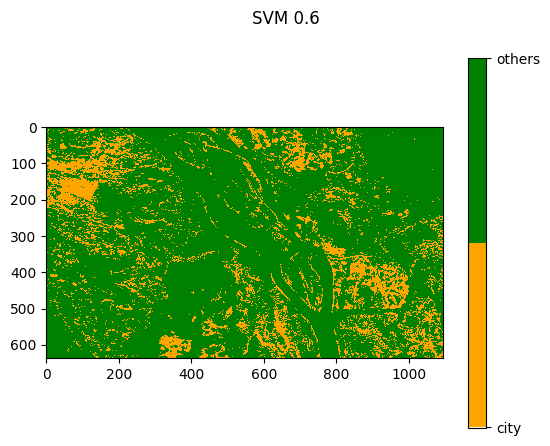

In [75]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plt.imshow(im0_6_svm, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("SVM 0.6")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

## >= 0.5

In [76]:
preditctions0_5 = np.where(predciton_proba[:, 0] >= 0.5, 1, 2)

In [77]:
preditctions0_5_nb = np.where(predciton_proba_nb[:, 0] >= 0.5, 1, 2)

In [78]:
preditctions0_5_svm = np.where(predciton_proba_svm[:, 0] >= 0.5, 1, 2)

In [79]:
im0_5  = preditctions0_5.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [80]:
im0_5_nb  = preditctions0_5_nb.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [81]:
im0_5_svm  = preditctions0_5_svm.reshape((real_prediction_knn.height,real_prediction_knn.width))

[Text(1, 1, 'city'), Text(1, 2, 'others')]

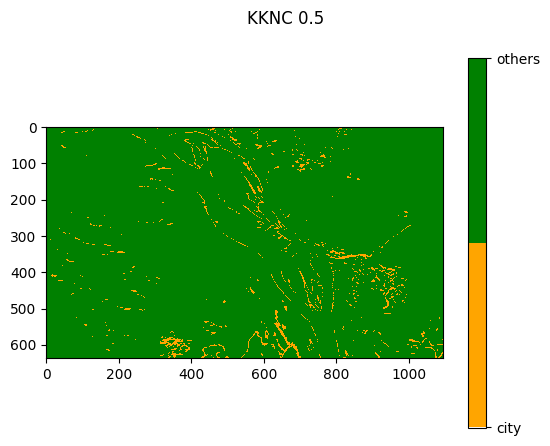

In [82]:
import matplotlib.pyplot as plt
plt.imshow(im0_5, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("KKNC 0.5")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

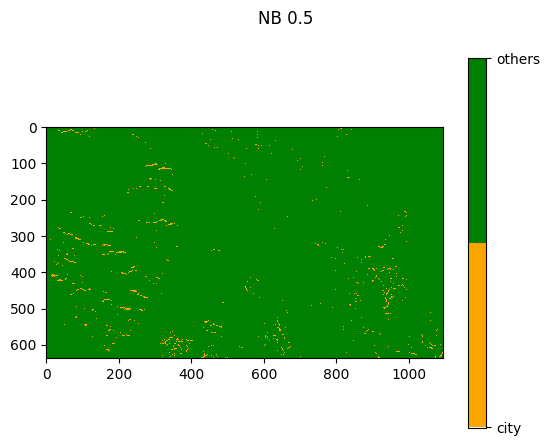

In [83]:
import matplotlib.pyplot as plt
plt.imshow(im0_5_nb, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("NB 0.5")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

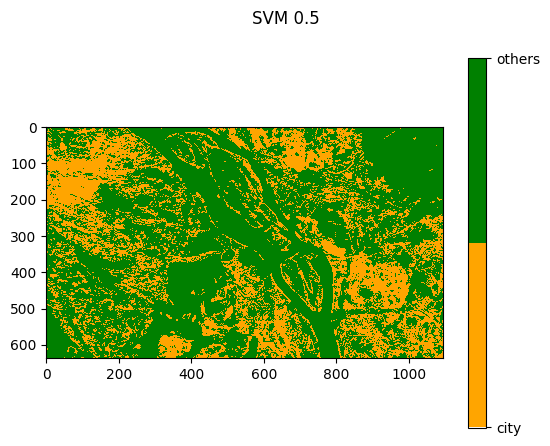

In [84]:
import matplotlib.pyplot as plt
plt.imshow(im0_5_svm, cmap=colormap)
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("SVM 0.5")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

In [85]:
len(im0_5[im0_5 == 1])

26784

In [32]:
imm = knn_1.predict(real_prediction_knn.x_scaled_base)

In [99]:
imm_nb = nb.predict(x_testt_scaled_2)

In [33]:
imm_d = imm.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [100]:
imm_d_nb = imm_nb.reshape((real_prediction_knn.height,real_prediction_knn.width))

In [36]:
imm_svm = svm.predict(real_prediction_knn.x_scaled_base)

In [37]:
imm_d_svm = imm_svm.reshape((real_prediction_knn.height,real_prediction_knn.width))

[Text(1, 1, 'city'), Text(1, 2, 'others')]

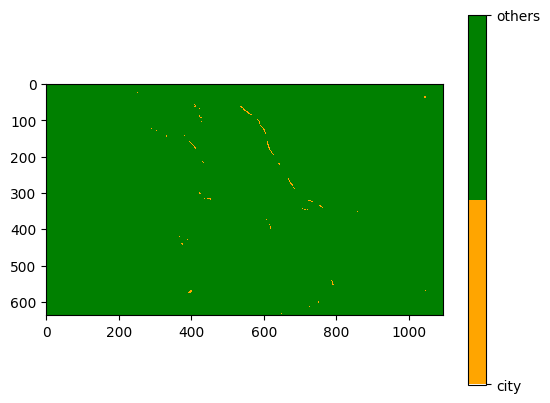

In [75]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plt.imshow(imm_d, cmap=ListedColormap(['orange','green']))
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("KKNC DEFAULT")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

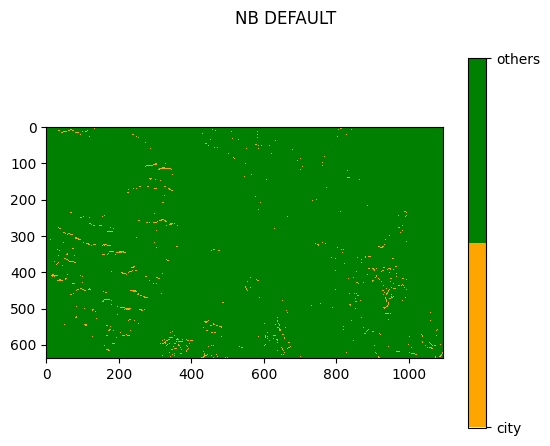

In [101]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plt.imshow(imm_d_nb, cmap=ListedColormap(['orange','green']))
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("NB DEFAULT")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'), Text(1, 2, 'others')]

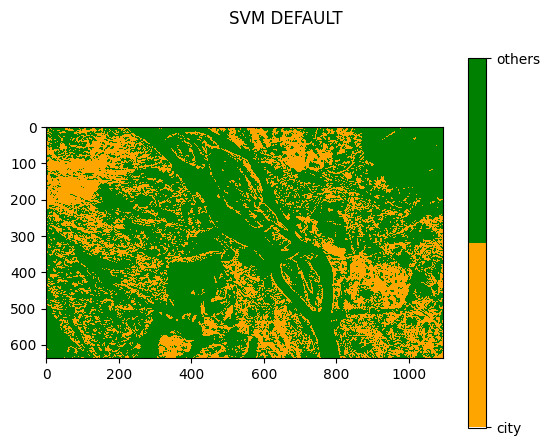

In [38]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plt.imshow(imm_d_svm, cmap=ListedColormap(['orange','green']))
labels = list(['city', 'others'])
values = list([1,2])
plt.suptitle("SVM DEFAULT")
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

In [76]:
real_prediction_knn.predict()

TypeError: 'NoneType' object is not iterable

# Complex map - Результати експерименту

In [99]:
imm_to_show = np.moveaxis(real_prediction_knn.image, -1, 0)

In [100]:
imm_to_show.shape

(3, 638, 1094)

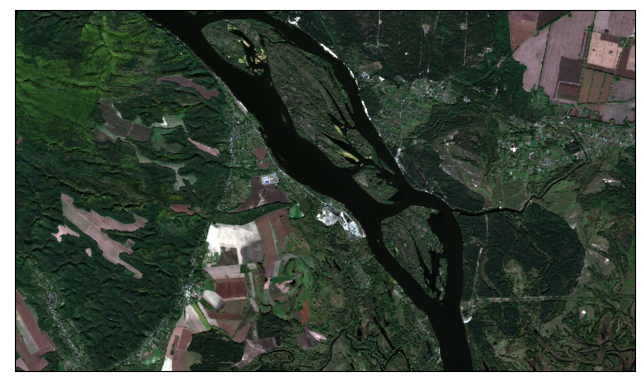

<AxesSubplot:>

In [101]:
import earthpy.plot as ep
#plt.imshow(real_prediction_knn.image)
ep.plot_rgb(
    imm_to_show,
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

# plt.show()

In [95]:
from dataset_tool.graph_utils import *

## KNNC

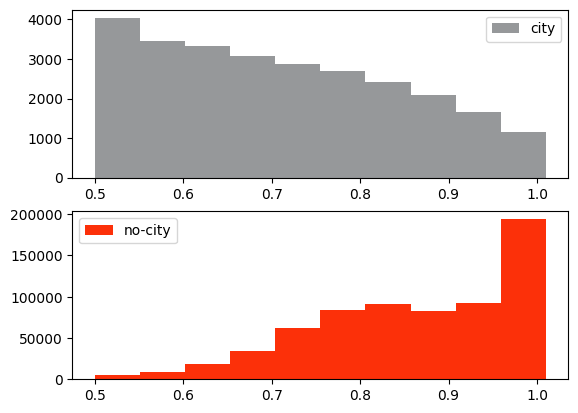

In [35]:
createHistGraph(predciton_proba, {'city': 1 ,'no-city' : 2})

## Naive Bayes

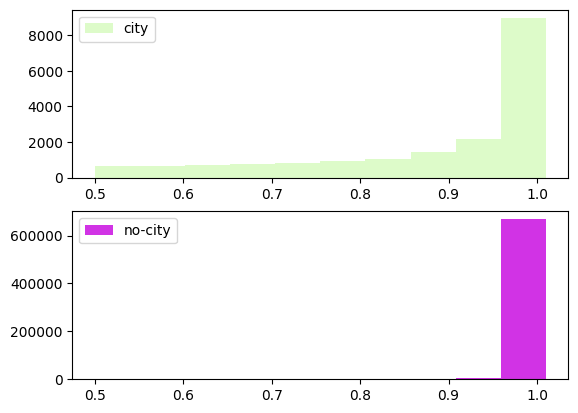

In [36]:
createHistGraph(predciton_proba_nb, {'city': 1 ,'no-city' : 2})

## SVM

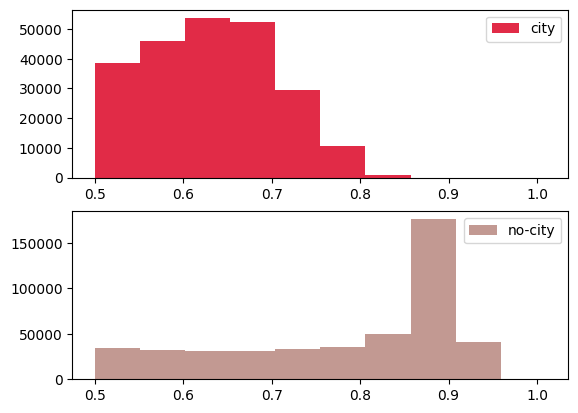

In [37]:
createHistGraph(predciton_proba_svm, {'city': 1 ,'no-city' : 2})

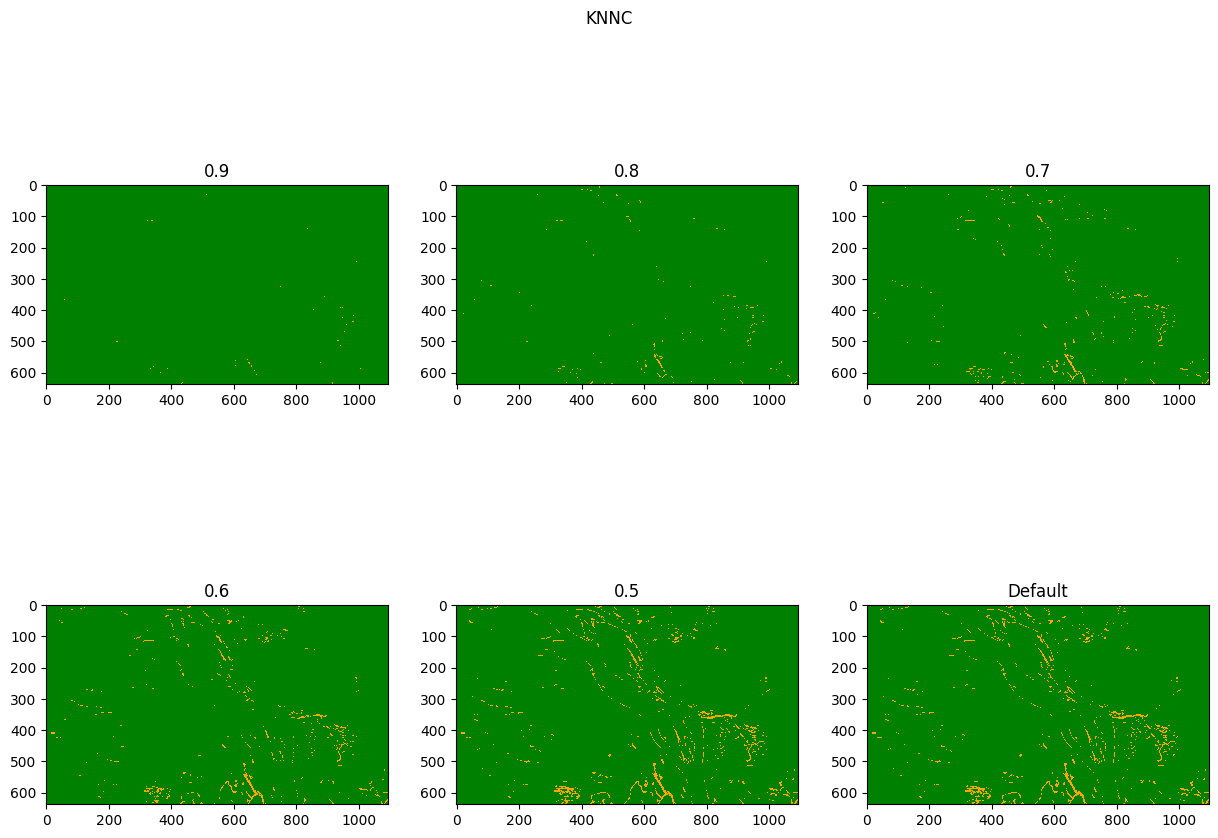

In [64]:
from PIL import Image


#svm_image_default_1 = svm_predict_test_1.reshape(arr_st2[0].shape)


fig, ax = plt.subplots(2,3,figsize=(15, 10))


im00 = ax[0,0].imshow(im0_9,cmap=colormap)
im01 = ax[0,1].imshow(im0_8,cmap=colormap)
im02 = ax[0,2].imshow(im0_7, cmap=colormap)
im10 = ax[1,0].imshow(im0_6, cmap=colormap)
im11 = ax[1,1].imshow(im0_5, cmap=colormap)
im12 = ax[1,2].imshow(imm_d, cmap=colormap)

#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
labels = list(['water' , 'nonwater'])
values = list([1,2])
ax[0,0].set_title("0.9")
ax[0,1].set_title("0.8")
ax[0,2].set_title("0.7")
ax[1,0].set_title("0.6")
ax[1,1].set_title("0.5")
ax[1,2].set_title("Default")
fig.suptitle("KNNC")
colorbar.ax.set_yticklabels(labels)
plt.show()

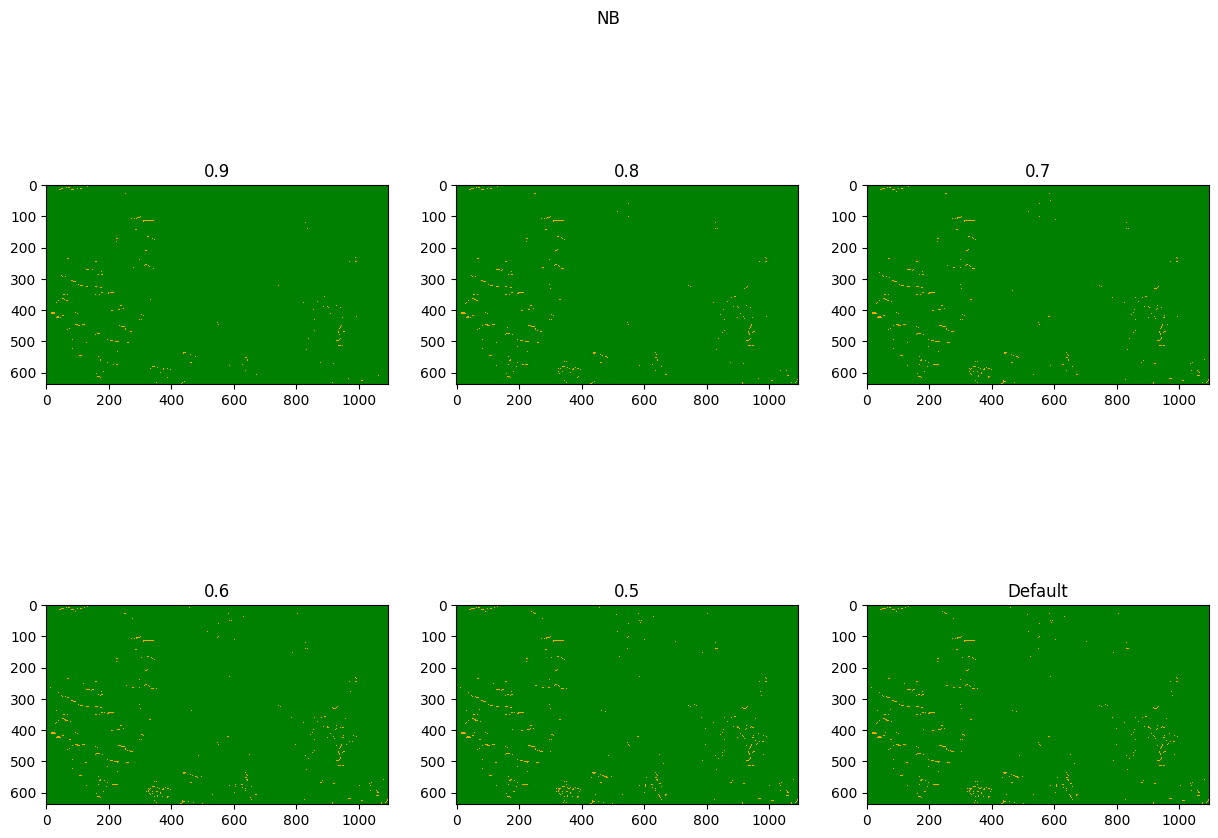

In [102]:
from PIL import Image


#svm_image_default_1 = svm_predict_test_1.reshape(arr_st2[0].shape)


fig, ax = plt.subplots(2,3,figsize=(15, 10))


im00 = ax[0,0].imshow(im0_9nb,cmap=colormap)
im01 = ax[0,1].imshow(im0_8_nb,cmap=colormap)
im02 = ax[0,2].imshow(im0_7_nb, cmap=colormap)
im10 = ax[1,0].imshow(im0_6_nb, cmap=colormap)
im11 = ax[1,1].imshow(im0_5_nb, cmap=colormap)
im12 = ax[1,2].imshow(imm_d_nb, cmap=colormap)

#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
labels = list(['water' , 'nonwater'])
values = list([1,2])
ax[0,0].set_title("0.9")
ax[0,1].set_title("0.8")
ax[0,2].set_title("0.7")
ax[1,0].set_title("0.6")
ax[1,1].set_title("0.5")
ax[1,2].set_title("Default")
fig.suptitle("NB")
colorbar.ax.set_yticklabels(labels)
plt.show()

In [86]:
im0_9_svm

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

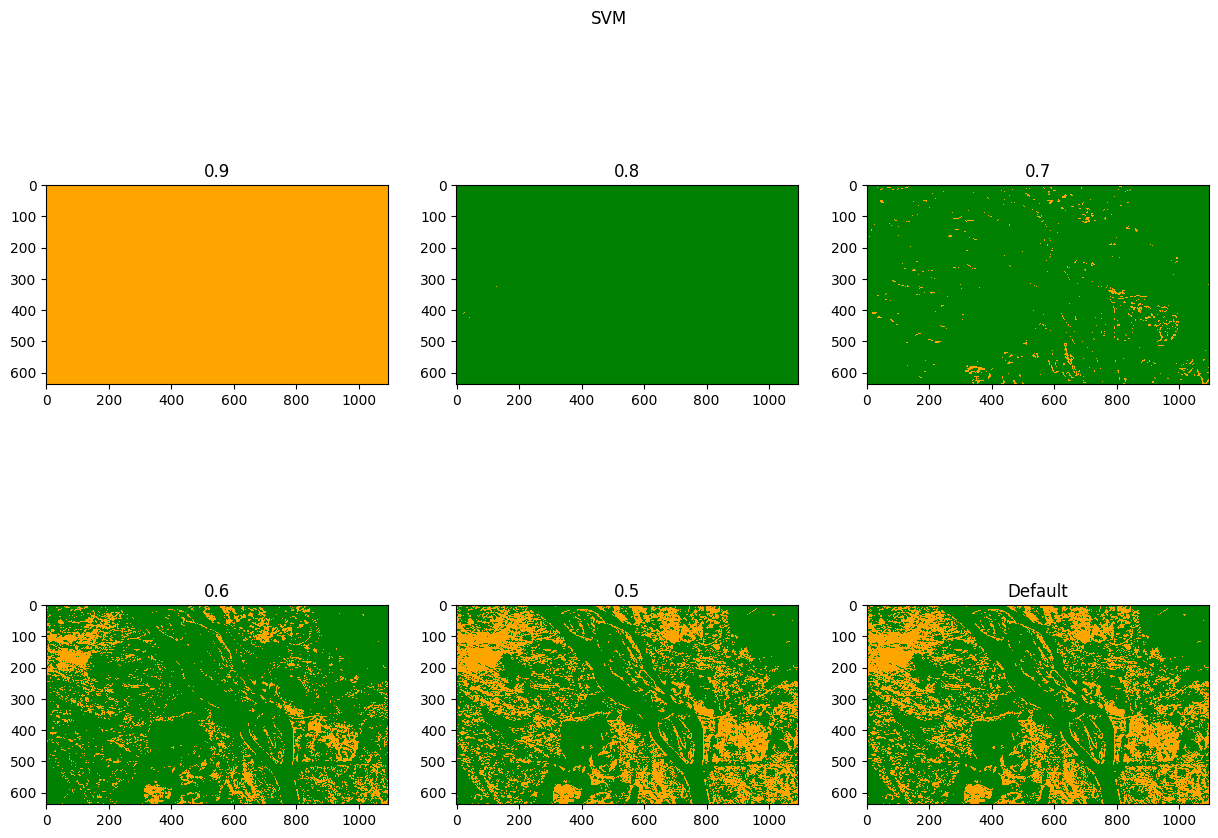

In [39]:
fig, ax = plt.subplots(2,3,figsize=(15, 10))


im00 = ax[0,0].imshow(im0_9_svm,cmap=colormap)
im01 = ax[0,1].imshow(im0_8_svm,cmap=colormap)
im02 = ax[0,2].imshow(im0_7_svm, cmap=colormap)
im10 = ax[1,0].imshow(im0_6_svm, cmap=colormap)
im11 = ax[1,1].imshow(im0_5_svm, cmap=colormap)
im12 = ax[1,2].imshow(imm_d_svm, cmap=colormap)

#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
labels = list(['water' , 'nonwater'])
values = list([1,2])
ax[0,0].set_title("0.9")
ax[0,1].set_title("0.8")
ax[0,2].set_title("0.7")
ax[1,0].set_title("0.6")
ax[1,1].set_title("0.5")
ax[1,2].set_title("Default")
fig.suptitle("SVM")
colorbar.ax.set_yticklabels(labels)
plt.show()